# Data Science Nigeria - SUPERVISED MACHINE LEARNING ALGORITHM: CLASSIFICATION
                                       


# PART TWO

Let Begin!!!

# Problem Definition

# You just return from school where you've learnt data science skills, On getting home you met your uncle who run a social network business in which his buyer will register to buy goods from him. During the course of the registration customers are given  an  ID automatically, they will fill up their age, gender and their estimated salary. Your uncle is having problem to know if so so person will patronise him or not, With your newly learnt data science skills you want to predict if someone will patronise your uncle or not so as to safe him the stress of thinking or even waste of time.

## Import Modules 

In [7]:
#import modules
import numpy as np #data trnaformation
import pandas as pd #to read and analyse data.
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns #for data visualization
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### reading data

In [8]:
data= pd.read_csv("Social_Network_Ads.csv", delimiter= ",")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploratory Data Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [10]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [11]:
data['Age'].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [12]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
# mean age and estimated salary of employees that did not buy and those that bought

buy_or_not= data.groupby('Purchased')
buy_or_not.mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


In [14]:
pd.crosstab(data['Purchased'], data['Gender']).head()

Gender,Female,Male
Purchased,,
0,127,130
1,77,66


In [15]:
#data.drop('EstimatedSalary', axis=1).groupby(['Purchased', 'Gender']).count()
#as you can see you can also use groupby to achive it with groupby, but cross tab ptint it better

In [16]:
pd.crosstab(data['Purchased'], data['Age']).T.head(10)
#pd.crosstab(data['Purchased'], data['Age']).T >> uncommment and run to view all

Purchased,0,1
Age,,
18,5,0
19,7,0
20,7,0
21,4,0
22,5,0
23,6,0
24,9,0
25,6,0
26,16,0


In [17]:
data_corr = data.corr()
data_corr

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


## Data Visualization

Text(0.5, 1.0, 'Age Frequency')

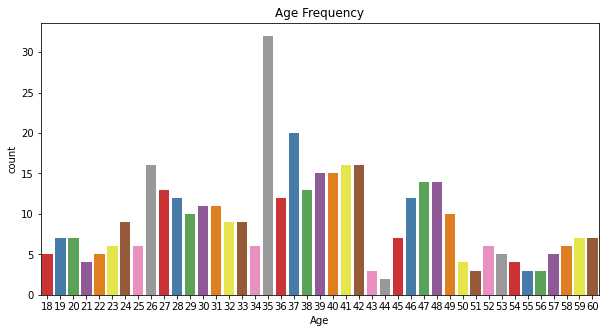

In [18]:
fig =plt.figure(figsize=(10,5))
sns.countplot(data['Age'],palette='Set1')
plt.title('Age Frequency')

Text(0.5, 1.0, 'Age Frequency')

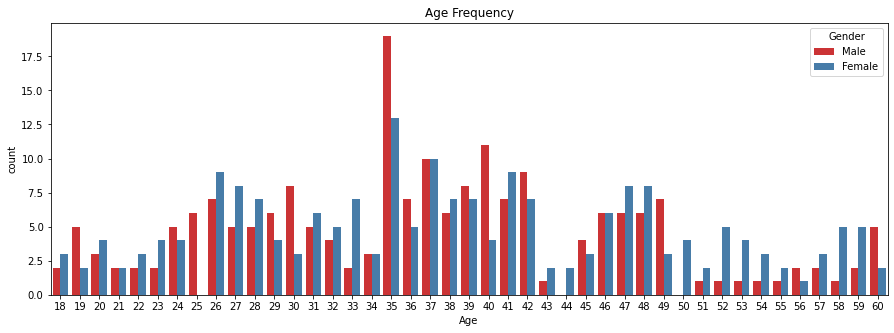

In [19]:
fig =plt.figure(figsize=(15,5))
sns.countplot(data['Age'], hue=data['Gender'], palette='Set1')
plt.title('Age Frequency')

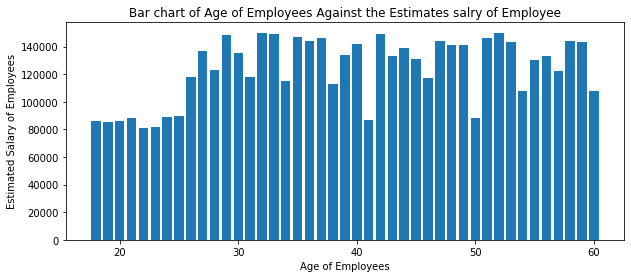

In [20]:
#how many users were in each category ?
fig = plt.figure(figsize=(10,4))
plt.bar(data.Age, data.EstimatedSalary,)
plt.xlabel("Age of Employees")
plt.ylabel("Estimated Salary of Employees")
plt.title("Bar chart of Age of Employees Against the Estimates salry of Employee")
plt.show()

In [21]:
#from the above barchart we can deduce that employee 7 and 211 have the highest Estimated Salary
#please list other employees with high Estimated Salary

In [22]:
data[data['EstimatedSalary'] == 150000]

#please give me the gender, age  and purchsed of the next 8 users with high estimated value
#apart from the 2 i show below

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
211,15735878,Male,52,150000,1


In [23]:
# ratio of users that did bought the Ads were only 36%
print(data.Purchased.value_counts())
float(data.Purchased.value_counts()[1])/len(data) * 100

0    257
1    143
Name: Purchased, dtype: int64


35.75

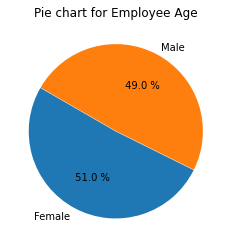

In [24]:
age_size = data.groupby('Gender').size()
plt.pie(age_size, startangle=150, explode=[0.005,0],autopct='% 1.1f %%',shadow=False, labels=['Female','Male'])
plt.title('Pie chart for Employee Age')
plt.show()

In [ ]:
sns.heatmap(data_corr)

## Pre-processing Data

In [ ]:
#creating a LabelEncoder object
#>>Label encoder is used to tranform categorical features to numeric
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
#invoking fit_transform method on object
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data['Gender'].value_counts()

### Skip feature engineering and move to model building.... you will come back to it

### feature engineering !

1) Using an Age category

youth[18-30], adult[31-45], old[46-60] 

In [ ]:
data['Age Category'] = ['youth' if 18<=age<=30 else 'adult' if 31<=age<=45 else 'old' if 46<=age<=60 else None \
 for age in list(data['Age'].values)]

In [ ]:
data.sample(5)

In [ ]:
data['Age Category'].value_counts()

In [ ]:
pd.crosstab(data['Purchased'], data['Age Category'])

2) Using an Income category [Inter-quartile Ranges]

In [ ]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [ ]:
data[['Income Category', 'EstimatedSalary']].sample(10)

min_val = 15000.000000
quarter_val = 43000.000000
median_val =70000.000000
percentile_val = 88000.000000
max_val = 150000.000000

Lets see the Visuals

In [ ]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

In [ ]:
plt.bar(age_cat.index.values, age_cat['Age'], color='cyan')
plt.ylabel("Numbers of Users")
plt.show()

In [ ]:
plt.bar(inc_cat.index.values, inc_cat['Age'], color='g')
plt.ylabel("Numbers of Users")
plt.show()

In [ ]:
#whats the statistics based on those who did not make purchase

features= ['Gender', 'Age Category', 'Income Category']
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data , hue= "Purchased")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

In [ ]:
data['Age Category']=le.fit_transform(data['Age Category'])
data['Income Category']=le.fit_transform(data['Income Category'])

# split data into features and target

X = data[['Gender', 'Age', 'EstimatedSalary','Age Category', 'Income Category']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split (X,y,test_size=0.3,random_state=42)

dep_df = pd.DataFrame(X_test.head())
y_confirm = y_test.head()
dep_df

# Move to model building

### Weldone if you obey the instruction, it's for your own good and learning process

## Splitting into train and test set

In [ ]:
data.columns

In [ ]:
# split data into features and target
X = data[['Gender', 'Age', 'EstimatedSalary']]
y =data['Purchased']

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split (X,y,test_size=0.3,random_state=42)

In [ ]:
dep_df = pd.DataFrame(X_test.head())
y_confirm = y_test.head()
print(dep_df)
# print('\n')
# print(y_confirm)

### Model Building

### Algorithm/ Model 1 : Naive Bayes

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
nb_pred = nb_classifier.predict(X_test)

### Evaluating Model performance : Confusion Matrix, Accuracy, Precision, Recall and F 1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
def display_confusion_matrix(test,pred,model_name =''):
    confmatrix= confusion_matrix(test, pred)
    ax = plt.subplot()
    sns.heatmap(confmatrix, annot=True, ax=ax, cbar=False)
    plt.title('Confusion Matrix for '+str(model_name) + '\n')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predicted')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

In [ ]:
display_confusion_matrix(y_test,nb_pred, 'naive bayes')

In [ ]:
# Ground Truth
pd.Series(y_test).value_counts()

In [ ]:
#checking naive baye's model accuracy, precision and recall

print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("Precision: ", precision_score(y_test, nb_pred))
print("Recall: ", recall_score(y_test, nb_pred))

In [ ]:
print(classification_report(y_test, nb_pred))

### Algorithm/ Model 2 : Support Vector Machine

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
sv_pred = sv_classifier.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, sv_pred))
print("Precision: ", precision_score(y_test, sv_pred))
print("Recall: ", recall_score(y_test, sv_pred))
print("F1 Score: ", f1_score(y_test, sv_pred))
display_confusion_matrix(y_test,sv_pred, 'SVM')

In [ ]:
print(classification_report(y_test, sv_pred))

### Algorithm/ Model 3 : Random Forest

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
rfc_pred = rfc_classifier.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, rfc_pred))
print("Precision: ", precision_score(y_test, rfc_pred))
print("Recall: ", recall_score(y_test, rfc_pred))
print("F1 Score: ", f1_score(y_test, rfc_pred))
display_confusion_matrix(y_test,rfc_pred, 'Random Forest')

# K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
knn_pred = knn_classifier.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, knn_pred))
print("Precision: ", precision_score(y_test, knn_pred))
print("Recall: ", recall_score(y_test, knn_pred))
print("F1 Score: ", f1_score(y_test, knn_pred))
display_confusion_matrix(y_test,knn_pred)

In [ ]:
print(classification_report(y_test,knn_pred))

# Model Deployment

### Naive Bayes

In [47]:
from sklearn.externals import joblib #module that will be used to deploy model


joblib.dump(nb_classifier, 'nb_model.pkl') #saving the built model on the storage device
nb_model = joblib.load('nb_model.pkl') #loading it from the storage device
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
print(nb_model.predict(dep_df))

[0 1 0 1 0]


In [49]:
print(y_confirm.values)

[0 1 0 1 0]


### Support Vector Machine

In [50]:

from sklearn.externals import joblib
joblib.dump(sv_classifier, 'sv_model.pkl')
sv_model = joblib.load('sv_model.pkl')
print(sv_model)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [51]:
print(sv_model.predict(dep_df))
print(y_confirm.values)

[0 0 0 0 0]
[0 1 0 1 0]


### Random forest

In [52]:
from sklearn.externals import joblib
joblib.dump(rfc_classifier, 'rfc_model.pkl')
rfc_model = joblib.load('rfc_model.pkl')
rfc_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
print(rfc_model.predict(dep_df))
print(y_confirm.values)

[1 1 0 1 0]
[0 1 0 1 0]


# K NEAREST NEIGHBOR

In [54]:
from sklearn.externals import joblib
joblib.dump(knn_classifier, 'knn_model.pkl')
knn_model = joblib.load('knn_model.pkl')
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
print(knn_model.predict(dep_df))
print(y_confirm.values)

[1 1 0 1 0]
[0 1 0 1 0]


### Now you can go back to feature engineering

#### Use engineered features i.e new columns in training your model. Confirm if it improves our models significantly or not ?

# Thanks for your time